In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import librosa
import matplotlib.pyplot as plt

Step 1: Split the dataset into training and testing sets

In [2]:
labels = {'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3}

In [3]:
X = np.array([])
for folder in os.listdir('./data'):
    for file in os.listdir(f"./data/{folder}"):
        X = np.append(X, f"data/{folder}/{file}")
y = np.array([0]*100 + [1]*100 + [2]*100 + [3]*100)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Step 2: Exploratory Data Analysis

In [8]:
random_samples = np.random.choice(X, 4)

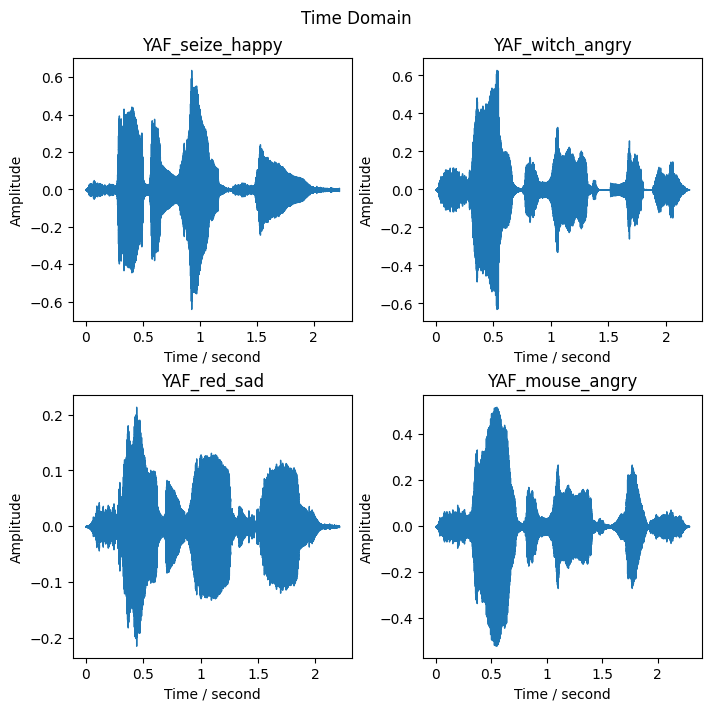

In [27]:
fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(7,7))
fig.suptitle("Time Domain")
for i,sample in enumerate(random_samples):
    signal, sample_rate = librosa.load(sample)
    if (i == 0):
        ax = axs[0,0]
    elif (i == 1):
        ax = axs[0,1]
    elif (i == 2):
        ax = axs[1,0]
    else:
        ax = axs[1,1]
    ax.set_title(sample.split('/')[2].split('.')[0])
    librosa.display.waveshow(y=signal, sr=sample_rate, ax=ax)
    ax.set_xlabel('Time / second')
    ax.set_ylabel('Amplitude')
plt.show()

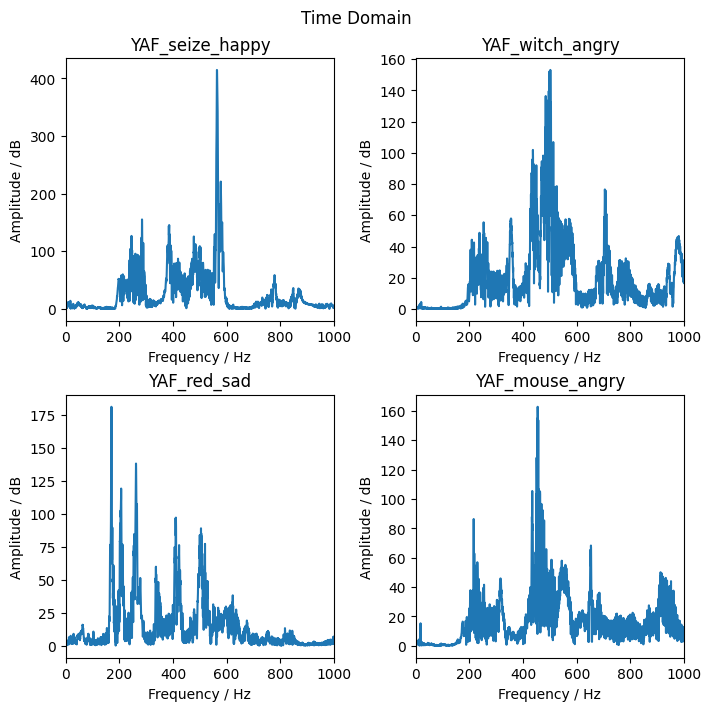

In [28]:
fig, axs = plt.subplots(2,2, constrained_layout=True, figsize=(7,7))
fig.suptitle("Time Domain")
for i,sample in enumerate(random_samples):
    signal, sample_rate = librosa.load(sample)
    if (i == 0):
        ax = axs[0,0]
    elif (i == 1):
        ax = axs[0,1]
    elif (i == 2):
        ax = axs[1,0]
    else:
        ax = axs[1,1]
    ax.set_title(sample.split('/')[2].split('.')[0])
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    ax.plot(freq, abs_DATA_0)
    ax.set_xlim(0, 1000)
    ax.set_xlabel('Frequency / Hz')
    ax.set_ylabel('Amplitude / dB')
plt.show()

Step 3: Acoustic Feature Extraction